# Supervised Machine Learning project: Mushroom dataset

1. Import data and python packages 
2. Assess Data Quality and Missing Values 
3. Exploratory Data Analysis
4. Logistic Regression
5. Support Vector Machine

### 1. Importation of data and Python packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn import metrics, svm

df=pd.read_csv('mushrooms.csv')

### 2. Assessment of Data Quality and Missing Values

In [2]:
df.shape

(8124, 23)

In [3]:
df.drop_duplicates(inplace=True)
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
for col in df:
    print('For column',col, 'the unique values are',df[col].unique())

For column class the unique values are ['p' 'e']
For column cap-shape the unique values are ['x' 'b' 's' 'f' 'k' 'c']
For column cap-surface the unique values are ['s' 'y' 'f' 'g']
For column cap-color the unique values are ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
For column bruises the unique values are ['t' 'f']
For column odor the unique values are ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
For column gill-attachment the unique values are ['f' 'a']
For column gill-spacing the unique values are ['c' 'w']
For column gill-size the unique values are ['n' 'b']
For column gill-color the unique values are ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
For column stalk-shape the unique values are ['e' 't']
For column stalk-root the unique values are ['e' 'c' 'b' 'r' '?']
For column stalk-surface-above-ring the unique values are ['s' 'f' 'k' 'y']
For column stalk-surface-below-ring the unique values are ['s' 'f' 'y' 'k']
For column stalk-color-above-ring the unique values are ['w' 'g' 'p' 'n'

###### We can see that stalk-root has a unique value of "?" which doesn't represent anything and that veil-type has only one unique value. 
###### I think we can remove Veil-type from the dataset and we should take a closer look at stalk root.

In [6]:
#Removing veil-type from study
df.drop('veil-type',inplace=True,axis=1)

The amount of data missing from the column stalk-root is equal to 30.526834071885773


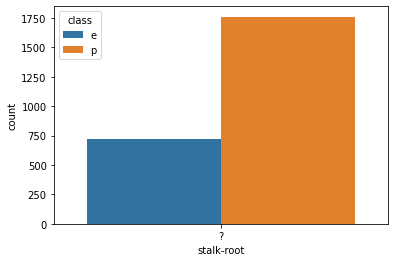

In [7]:
#Taking a closer look at stalk-root==?
missing=df[df['stalk-root']=='?']
sns.countplot(x='stalk-root',hue='class',data=missing)


print('The amount of data missing from the column stalk-root is equal to',len(missing)/len(df['stalk-root'])*100)

0.4915254237288136


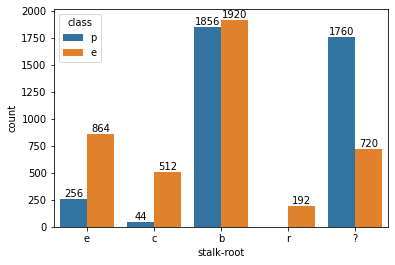

In [8]:
ax=sns.countplot(x='stalk-root',hue='class', data=df)
for container in ax.containers:
    ax.bar_label(container)

df['stalk-root'].mode()
modeb=df[df['stalk-root']=='b']
print(len(modeb[modeb['class']=='p'])/len(modeb))

0.578005115089514


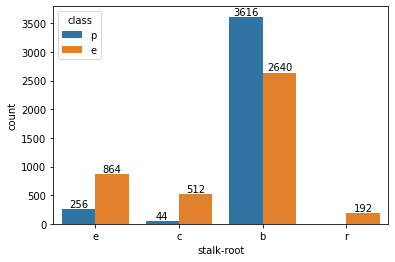

In [9]:
df['stalk-root']=df['stalk-root'].replace('?',df['stalk-root'].value_counts().idxmax())
ax=sns.countplot(x='stalk-root',hue='class', data=df)
for container in ax.containers:
    ax.bar_label(container)

df['stalk-root'].mode()
modeb=df[df['stalk-root']=='b']
print(len(modeb[modeb['class']=='p'])/len(modeb))


###### Although only 30% of the data is missing and could be added up onto 'b' feature of stalk-root, I am hesitant whether it's a good idea because it's very important that our model reduces to the maximum the amount of false negatives as this could have consequences on human health. However, as the result shows, after putting in all the missing data into the 'b' feature, the proportion of poisonous mushrooms increased. 

### 3. Exploratory analysis

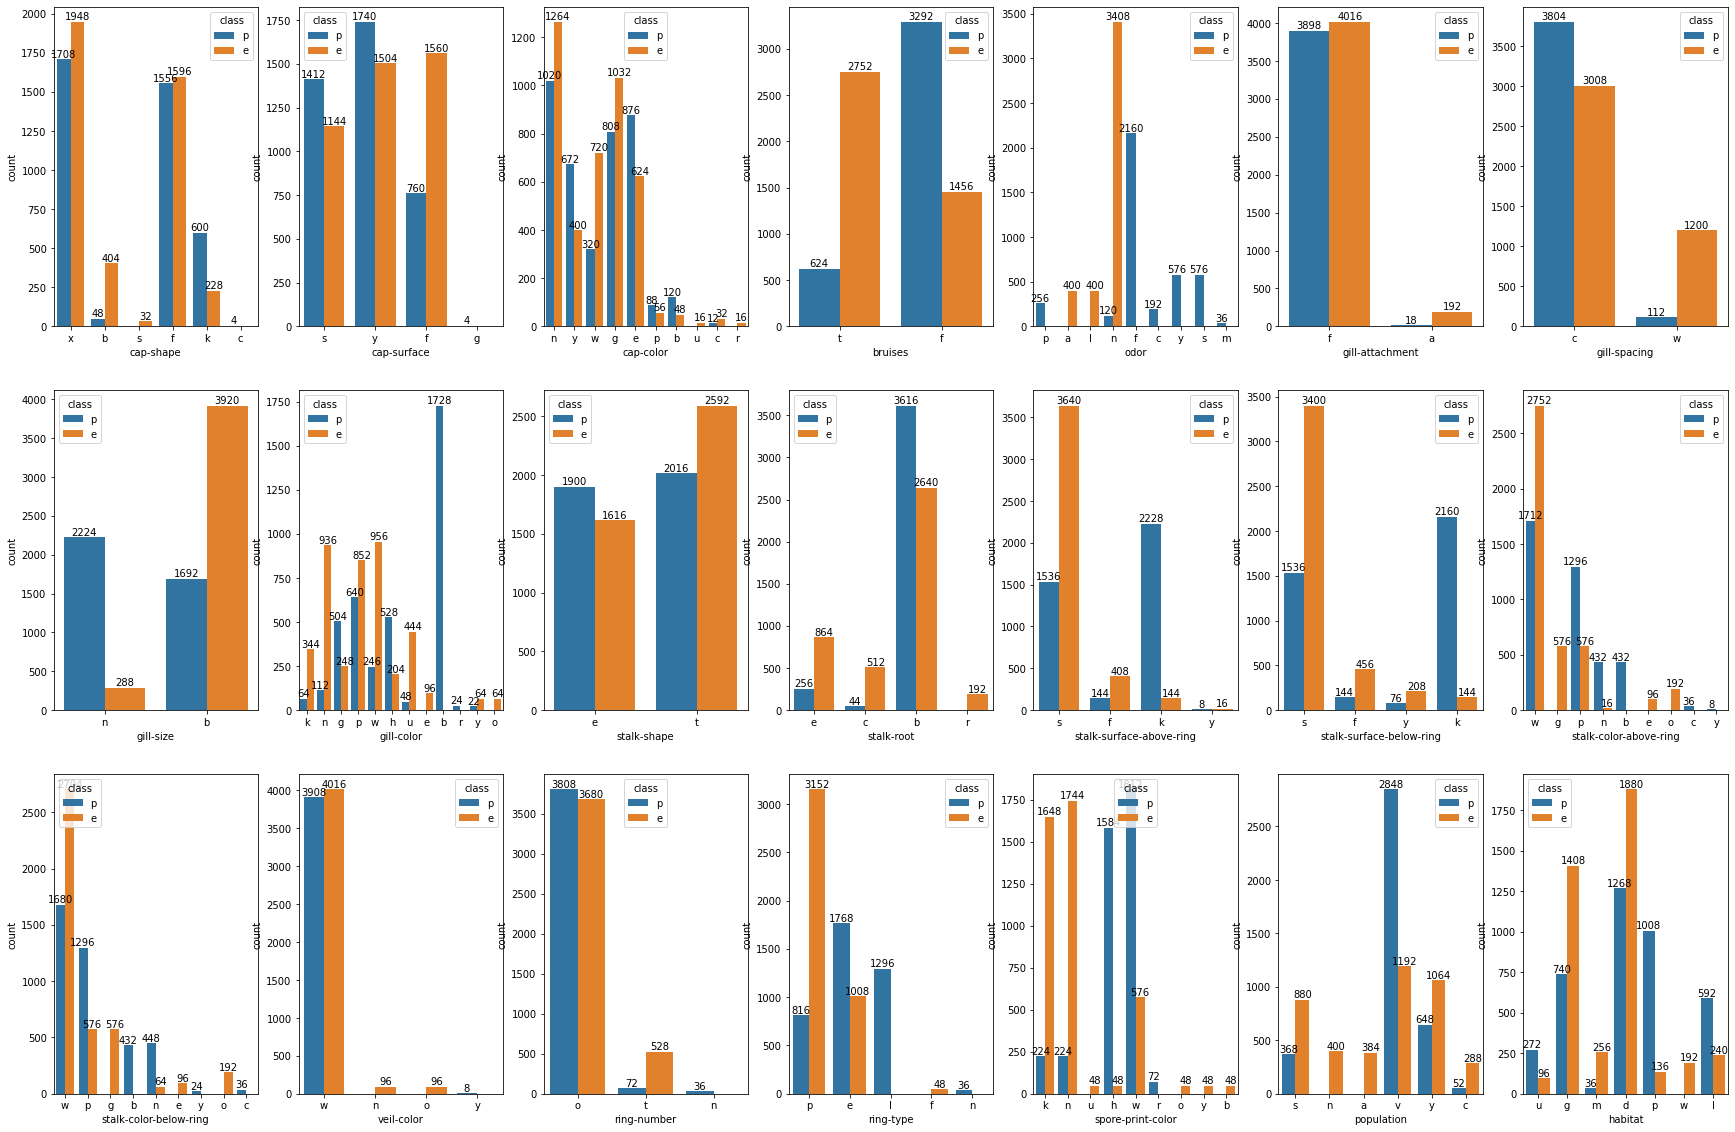

In [10]:
cols=df.columns[1:].tolist()

plt.subplots(3,7,figsize=(30,20))

# for i in range(len(cols)):
#     plt.subplot(3,7,i+1)
#     sns.countplot(data=df,hue='class', x=cols[i])
# plt.show()

for i in range(len(cols)):
    plt.subplot(3,7,i+1)
    ax=sns.countplot(data=df, hue='class', x=cols[i])
    for container in ax.containers:
        ax.bar_label(container)
    
    
plt.show()
    

###### According to the graphs, spore-print color, population, habitat, 

### 4. Logistic Regression

In [11]:
#Converting all the columns into integers 
col=df.columns.tolist()
encoder=LabelEncoder()
da=pd.DataFrame()

for i in range(len(col)):
    da[df.columns.to_list()[i]]=encoder.fit_transform(df.iloc[:,i])
da.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [12]:
X=da.iloc[:,1:].values 

y=da.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

print('The predictive score of this model is',logreg.score(X_test,y_test))


The predictive score of this model is 0.9586410635155096


In [13]:
# Confusion matrix

from sklearn.metrics import confusion_matrix 
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1031,   30],
       [  54,  916]], dtype=int64)

###### With logistic regression, we are getting 54 false negatives. In the case of poisonous mushrooms we don't want to miscategorise a mushroom. Therefore, it would be ideal if we could have as little false negatives as possible.

AUC: 0.958027


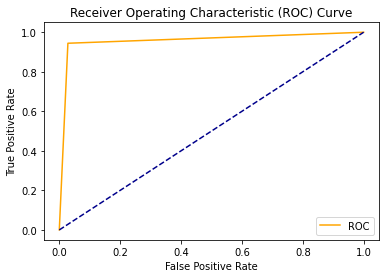

In [14]:
auc = roc_auc_score(y_test,y_pred)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test,y_pred)[0:2] # Why is it [0:2]?
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### 5. Support Vector Machine (SVM)

In [15]:
linear_SVM = svm.SVC(kernel='linear')
sigmoid_SVM=svm.SVC(kernel='sigmoid')
rbf_SVM = svm.SVC(kernel='rbf')

linear_SVM.fit(X_train,y_train)
sigmoid_SVM.fit(X_train,y_train)
rbf_SVM.fit(X_train,y_train)

y_pred_linear = linear_SVM.predict(X_test)
y_pred_sigmoid = sigmoid_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

print('Accuracy (linear:)', metrics.accuracy_score(y_test, y_pred_linear))
print('Accuracy (sigmoid):', metrics.accuracy_score(y_test, y_pred_sigmoid))
print('Accuracy (rbf):', metrics.accuracy_score(y_test,y_pred_rbf))

Accuracy (linear:) 0.9886755292959133
Accuracy (sigmoid): 0.826686361398326
Accuracy (rbf): 1.0


In [16]:
cfm=confusion_matrix(y_test,y_pred_rbf)
cfm

array([[1061,    0],
       [   0,  970]], dtype=int64)

###### Here, all the mushrooms are being correctly classified

AUC: 1.000000


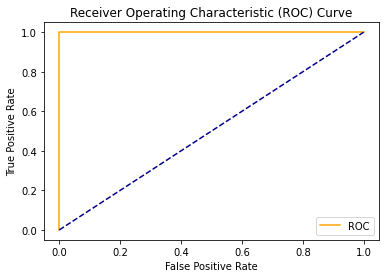

In [17]:
auc = roc_auc_score(y_test,y_pred_rbf)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test,y_pred_rbf)[0:2] # Why is it [0:2]?

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()